# 1. EDA
Reference:
- [NanoMathias, Feature Engineering & Importance Testing](https://www.kaggle.com/nanomathias/feature-engineering-importance-testing)
- [NanoMathias, Bayesian Tuning of xgBoost & lightGBM | LB: 0.9769](https://www.kaggle.com/nanomathias/bayesian-tuning-of-xgboost-lightgbm-lb-0-9769)
- [gopisaran, Indepth EDA - Entire TalkingData dataset](https://www.kaggle.com/gopisaran/indepth-eda-entire-talkingdata-dataset)

## Run name

In [1]:
import time

project_name = 'TalkingdataAFD2018'
step_name = 'EDA'
time_str = time.strftime("%Y%m%d_%H%M%S", time.localtime())
run_name = '%s_%s_%s' % (project_name, step_name, time_str)
print('run_name: %s' % run_name)
t0 = time.time()

run_name: TalkingdataAFD2018_EDA_20180423_100355


## Important params

In [2]:
date = 9
# test_n_rows = 18790469
test_n_rows = None

In [3]:
day_rows = {
    6: {
        'n_skiprows': 1,
        'n_rows': 9308568
    },
    7: {
        'n_skiprows': 1 + 9308568,
        'n_rows': 59633310
    },
    8: {
        'n_skiprows': 1 + 9308568 + 59633310,
        'n_rows': 62945075
    },
    9: {
        'n_skiprows': 1 + 9308568 + 59633310 + 62945075,
        'n_rows': 53016937
    }
}
n_skiprows = day_rows[date]['n_skiprows']
n_rows = day_rows[date]['n_rows']

## Import PKGs

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display

import os
import gc
import time
import random
import zipfile
import h5py
import pickle
import math
from PIL import Image
import shutil

from tqdm import tqdm
import multiprocessing
from multiprocessing import cpu_count

from sklearn.metrics import roc_auc_score

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Project folders

In [5]:
cwd = os.getcwd()

input_folder = os.path.join(cwd, 'input')
output_folder = os.path.join(cwd, 'output')
model_folder = os.path.join(cwd, 'model')
log_folder = os.path.join(cwd, 'log')
print('input_folder: \t\t\t%s' % input_folder)
print('output_folder: \t\t\t%s' % output_folder)
print('model_folder: \t\t\t%s' % model_folder)
print('log_folder: \t\t\t%s' % log_folder)

train_csv_file = os.path.join(input_folder, 'train.csv')
train_sample_csv_file = os.path.join(input_folder, 'train_sample.csv')
test_csv_file = os.path.join(input_folder, 'test.csv')
sample_submission_csv_file = os.path.join(input_folder, 'sample_submission.csv')

print('\ntrain_csv_file: \t\t%s' % train_csv_file)
print('train_sample_csv_file: \t\t%s' % train_sample_csv_file)
print('test_csv_file: \t\t\t%s' % test_csv_file)
print('sample_submission_csv_file: \t%s' % sample_submission_csv_file)

input_folder: 			D:\ref\talkingdata-adtracking-fraud-detection\input
output_folder: 			D:\ref\talkingdata-adtracking-fraud-detection\output
model_folder: 			D:\ref\talkingdata-adtracking-fraud-detection\model
log_folder: 			D:\ref\talkingdata-adtracking-fraud-detection\log

train_csv_file: 		D:\ref\talkingdata-adtracking-fraud-detection\input\train.csv
train_sample_csv_file: 		D:\ref\talkingdata-adtracking-fraud-detection\input\train_sample.csv
test_csv_file: 			D:\ref\talkingdata-adtracking-fraud-detection\input\test.csv
sample_submission_csv_file: 	D:\ref\talkingdata-adtracking-fraud-detection\input\sample_submission.csv


## Load data

In [6]:
%%time
train_csv = pd.read_csv(train_csv_file, skiprows=range(1, n_skiprows), nrows=n_rows, parse_dates=['click_time'])
test_csv = pd.read_csv(test_csv_file, nrows=test_n_rows, parse_dates=['click_time'])
sample_submission_csv = pd.read_csv(sample_submission_csv_file)

print('train_csv.shape: \t\t', train_csv.shape)
print('test_csv.shape: \t\t', test_csv.shape)
print('sample_submission_csv.shape: \t', sample_submission_csv.shape)
print('train_csv.dtypes: \n', train_csv.dtypes)

display(train_csv.head(2))
display(test_csv.head(2))
display(sample_submission_csv.head(2))

train_csv.shape: 		 (53016937, 8)
test_csv.shape: 		 (18790469, 7)
sample_submission_csv.shape: 	 (18790469, 2)
train_csv.dtypes: 
 ip                          int64
app                         int64
device                      int64
os                          int64
channel                     int64
click_time         datetime64[ns]
attributed_time            object
is_attributed               int64
dtype: object


,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,201143,11,1,13,487,2017-11-09,NaN,0
1,34684,2,1,13,469,2017-11-09,NaN,0


,click_id,ip,app,device,os,channel,click_time
0,0,5744,9,1,3,107,2017-11-10 04:00:00
1,1,119901,9,1,3,466,2017-11-10 04:00:00


,click_id,is_attributed
0,0,0
1,1,0


Wall time: 2min 11s


## Analyses

In [7]:
train_csv['day'] = train_csv['click_time'].dt.day.astype('uint8')
train_csv['hour'] = train_csv['click_time'].dt.hour.astype('uint8')
train_csv['minute'] = train_csv['click_time'].dt.minute.astype('uint8')
train_csv['second'] = train_csv['click_time'].dt.second.astype('uint8')
print('train_csv.shape: \t', train_csv.shape)
display(train_csv.head(2))

train_csv.shape: 	 (53016937, 12)


,ip,app,device,os,channel,click_time,attributed_time,is_attributed,day,hour,minute,second
0,201143,11,1,13,487,2017-11-09,NaN,0,9,0,0,0
1,34684,2,1,13,469,2017-11-09,NaN,0,9,0,0,0


In [8]:
test_csv['day'] = test_csv['click_time'].dt.day.astype('uint8')
test_csv['hour'] = test_csv['click_time'].dt.hour.astype('uint8')
test_csv['minute'] = test_csv['click_time'].dt.minute.astype('uint8')
test_csv['second'] = test_csv['click_time'].dt.second.astype('uint8')
print('test_csv.shape: \t', test_csv.shape)
display(test_csv.head(2))

test_csv.shape: 	 (18790469, 11)


,click_id,ip,app,device,os,channel,click_time,day,hour,minute,second
0,0,5744,9,1,3,107,2017-11-10 04:00:00,10,4,0,0
1,1,119901,9,1,3,466,2017-11-10 04:00:00,10,4,0,0


In [9]:
train_gp_day = train_csv.groupby(['day']).size()
print(train_gp_day.shape)
print(train_gp_day)

(1,)
day
9    53016937
dtype: int64


In [10]:
test_gp_day = test_csv.groupby(['day']).size()
print(test_gp_day.shape)
print(test_gp_day)

(1,)
day
10    18790469
dtype: int64


(17,)
day  hour
9    0       3318301
     1       3082862
     2       3068887
     3       3351149
     4       4032691
     5       3671741
     6       3570940
     7       3186240
     8       2804701
     9       2986204
     10      3304199
     11      3347741
     12      3363917
     13      3457523
     14      3443283
     15      3026111
     16          447
dtype: int64


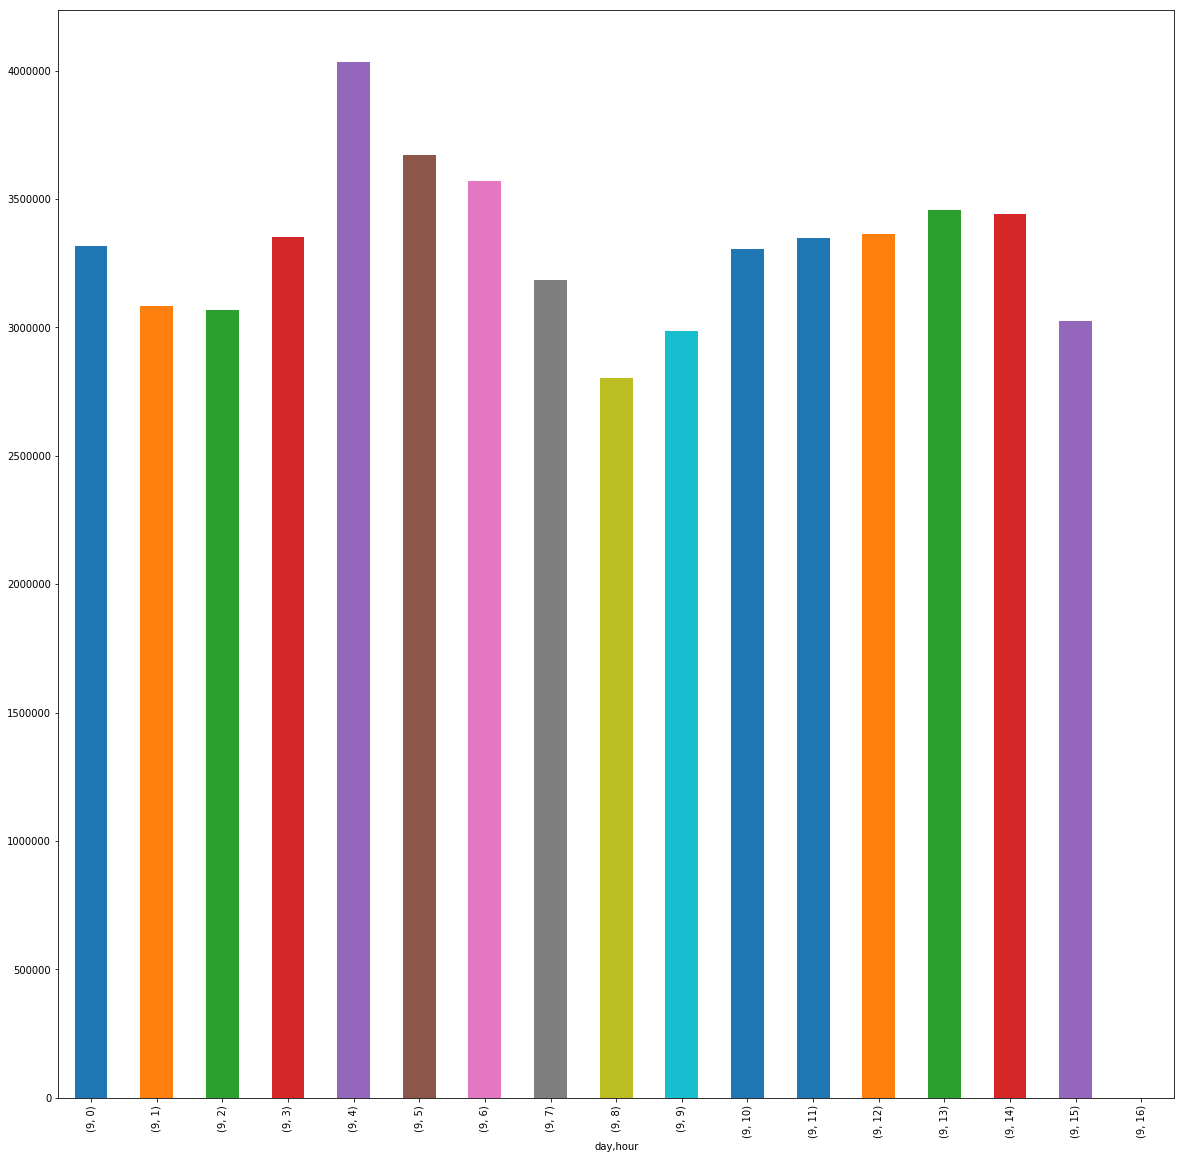

In [11]:
train_gp_day = train_csv.groupby(['day', 'hour']).size()
print(train_gp_day.shape)
print(train_gp_day)
train_gp_day.plot(kind='bar', figsize=(20, 20))

(9,)
day  hour
10   4       3344125
     5       2858427
     6           381
     9       2984808
     10      3127993
     11          413
     13      3212566
     14      3261257
     15          499
dtype: int64


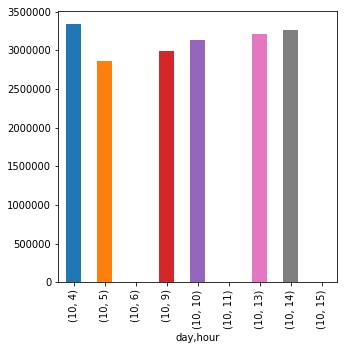

In [12]:
test_gp_day = test_csv.groupby(['day', 'hour']).size()
print(test_gp_day.shape)
print(test_gp_day)
test_gp_day.plot(kind='bar', figsize=(5, 5))

In [13]:
print(run_name)
print('Time cost: %.2f s' % (time.time() - t0))

print('Done!')

TalkingdataAFD2018_EDA_20180423_100355
Time cost: 155.82 s
Done!
